## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.** (first question I completed)
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression: In a regression problem, we predict a numeric or continuous value. For example, predicting sales involves estimating a value based on certain input features.
Classification: In classification, the goal is to predict which category or class an instance most likely belongs to. For example, instead of predicting a continuous value like sales, the goal might be to predict the vehicle category (e.g., sedan, SUV, truck) based on features such as price, engine size, fuel economy, and the number of doors.
2. A confusion table is a "cross-tabulation of predicted and actual values"
3. The SSE quantify's the sum of squared error of a particular model ( the squared differences between the observed values and the predicted values). A lower SSE means a better-fitting model and a higher SSE suggests poor model performance.
4. Underfitting is when your model is too simple to reliably explain the phenomenon you are interested in. On the contrary,  overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in.
5. Splitting the data is to make sure that the model is evaluated on data it has not seen before, which provides a more realistic measure of its performance on new data. Evaluating the performance using a test set helps detect overfitting and underfitting, as I mentioned before, leading to a better model. Choosing an appropriate value for 𝑘 (in KNN) by evaluating accuracy or SSE on the test set helps balance model complexity, which reduces the risk of overfitting or underfitting.
6. Class label prediction: The pros are it's straightforward and easy to interpret. It's useful when you just need to know which class the model predicts.
In terms of cons, it doesn't provide any information about the model's confidence in its prediction. This isn't always a problem but can be when dealing with uncertain cases.
Probability distribution:
Pros are that it provides more information (ex: the model's confidence in its predictions.) This is helpful when making decisions based on confidence thresholds/ combining multiple models. The cons are that it can be harder to interpret, and in some cases, the probabilities may be unreliable which has the ability to lead to misinformed decisions.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data. (second question I completed)

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Question 1, part 1

In [15]:
! git clone https://github.com/ds4e/knn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv', low_memory=False)
new_df = df[['price', 'year', 'mileage']]
print(new_df.head(100),'\n')
new_df = new_df.dropna()

fatal: destination path 'knn' already exists and is not an empty directory.
    price  year  mileage
0    6300  2008   274117
1    2899  2011   190552
2    5350  2018    39590
3   25000  2014    64146
4   27700  2018     6654
..    ...   ...      ...
95  53500  2017    29355
96  15110  2017    39333
97  34000  2015    42930
98  26502  2017    24993
99   5990  2017    44929

[100 rows x 3 columns] 



Question 1, part 2

In [16]:
# Min-max normalize the 'year' and 'mileage' columns in new_df
new_df['year'] = (new_df['year'] - new_df['year'].min()) / (new_df['year'].max() - new_df['year'].min())
new_df['mileage'] = (new_df['mileage'] - new_df['mileage'].min()) / (new_df['mileage'].max() - new_df['mileage'].min())
print(new_df.head(100),'\n')

    price      year   mileage
0    6300  0.744681  0.269287
1    2899  0.808511  0.187194
2    5350  0.957447  0.038892
3   25000  0.872340  0.063016
4   27700  0.957447  0.006537
..    ...       ...       ...
95  53500  0.936170  0.028838
96  15110  0.936170  0.038640
97  34000  0.893617  0.042174
98  26502  0.936170  0.024553
99   5990  0.936170  0.044137

[100 rows x 3 columns] 



Question 1, part 3, 4, 5

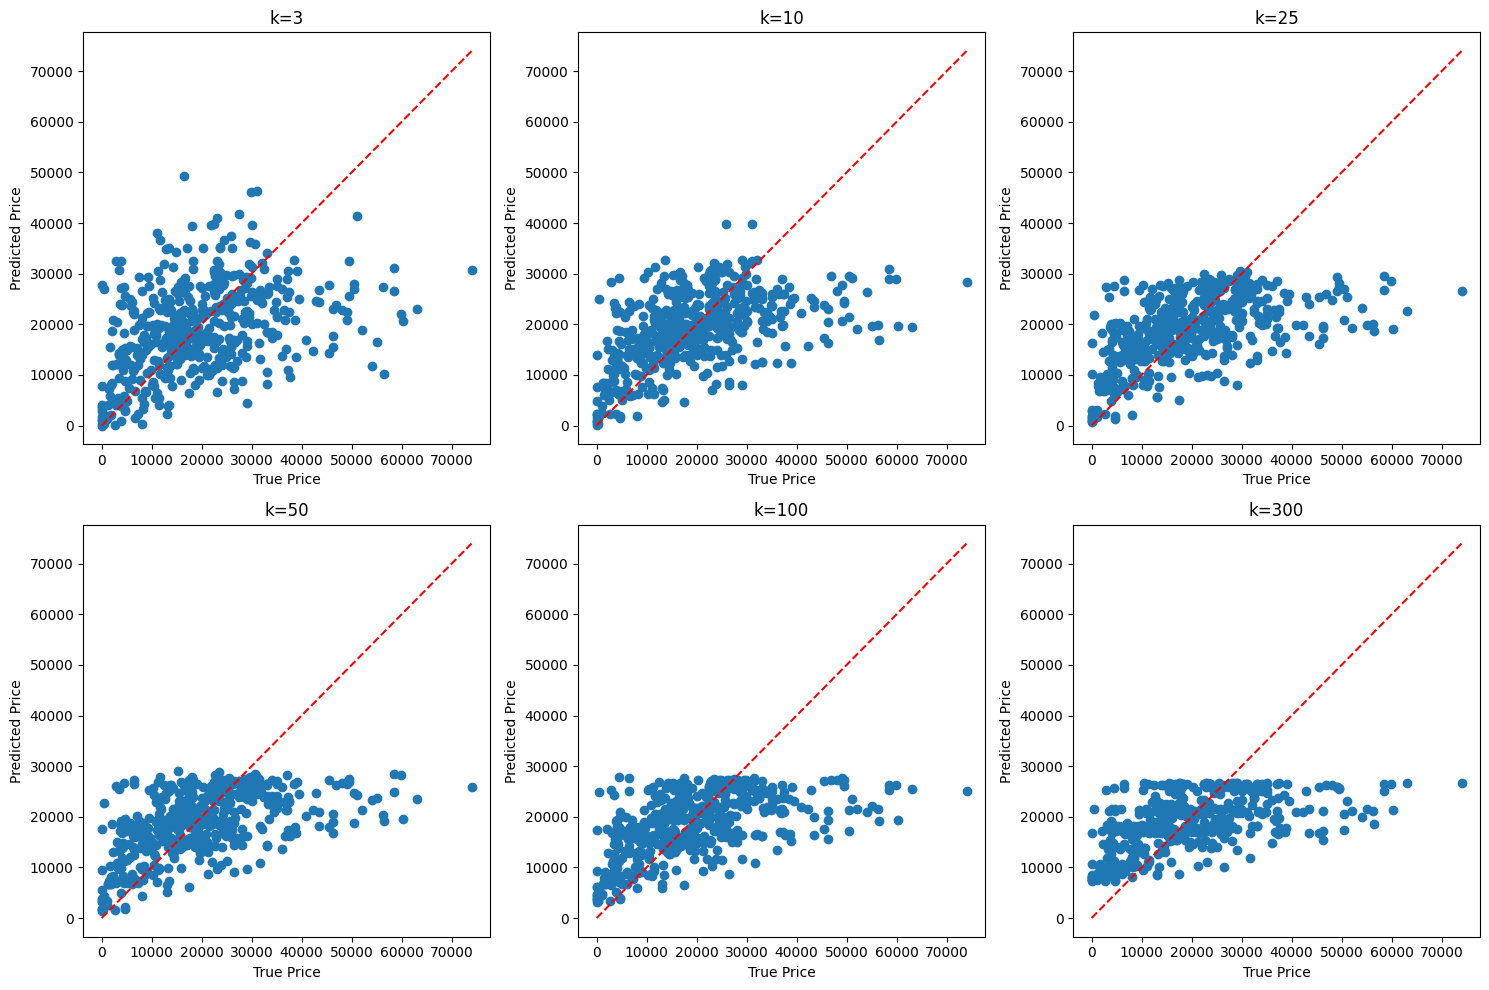

Optimal k: 50


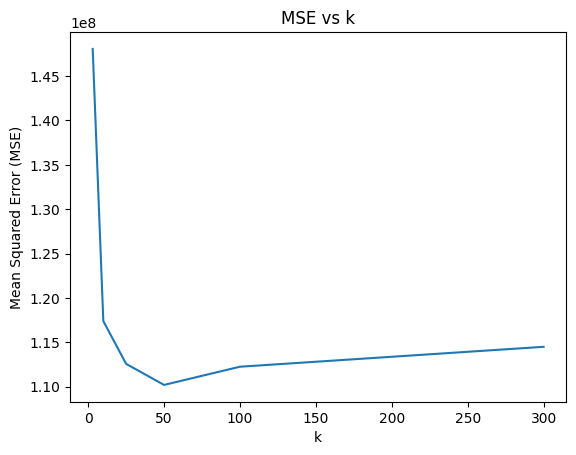

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'new_df' contains your data with 'price', 'year', and 'mileage'
y = new_df['price']  # Target variable: 'price'
X = new_df[['year', 'mileage']]  # Features: 'year', 'mileage'

# Normalize the features using min-max scaling
X = (X - X.min()) / (X.max() - X.min())

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Values of k to try
k_values = [3, 10, 25, 50, 100, 300]

# Set up plot for scatterplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# List to store MSE for each k for determining optimal k
mse_values = []

# Loop over k values to train models and evaluate performance
for i, k in enumerate(k_values):
    # Train KNN model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

      # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Scatter plot of test vs predicted values
    axes[i].scatter(y_test, y_pred)
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
    axes[i].set_title(f'k={k}')
    axes[i].set_xlabel('True Price')
    axes[i].set_ylabel('Predicted Price')

# Adjust layout for scatterplots
plt.tight_layout()
plt.show()

# Find the optimal k that minimizes the MSE
optimal_k = k_values[np.argmin(mse_values)]
print(f'Optimal k: {optimal_k}')

# Plot MSE vs k to visualize the optimal k
plt.plot(k_values, mse_values, label='MSE')
plt.xlabel("k")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs k")
plt.show()

Question 1, part 4 (in depth) - What patterns do you notice as you increase  𝑘 ?

I notice that as k increases, because the scatterplots show how predictions for the test set become smoother and less sensitive to individual data points, the larger k values smooth out predictions (which could potentially underfit the data)

Question 1, part 6 - Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k increases, the model transitions from overfitting (small k) to underfitting (large k). With small k values, the scatterplot shows a lot of noise and variance as the model fits too closely to the training data. As k increases, the model generalizes better, and the predictions align more with the true values, but with larger k values, the model starts to smooth out important patterns, resulting in underfitting. The ideal k balances these effects, minimizing error while capturing the underlying trends in the data.

Ack: I used Chat GPT to help me with parts of this assignment.